In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
os.getcwd()

'/home/luke/workspace/Investible-Stocks-Selection/Luke_working_space'

In [3]:
def read_data(directory_str,sheet_index):
    df = pd.read_excel(directory_str,sheet_index)
    df.index = df.iloc[:,0]
    df = df.iloc[:,[1]]
    df = df.dropna()
    # convert index to pd.DatetimeIndex
    if type(df.index) != pd.DatetimeIndex:
        df.index = pd.DatetimeIndex(df.index)
    df = df.replace(".",np.nan)
    return df

def read_csv(directory_str):
    data = pd.read_csv(directory_str)
    df = pd.DataFrame(pd.to_numeric(data.iloc[:,1].replace(".",np.nan)).values,index = data.iloc[:,0].values)
    df.columns = data.iloc[:,[1]].columns
    df = df.dropna()
    # convert index to pd.DatetimeIndex
    if type(df.index) != pd.DatetimeIndex:
        df.index = pd.DatetimeIndex(df.index)
    return df

In [4]:
def model_data(x,y):
    merged_data = pd.concat([y,x],1).resample("M").last().dropna()
    y = merged_data[y.columns].loc[merged_data.index,:]
    x = merged_data[x.columns].loc[merged_data.index,:]
    return(x,y)

In [5]:
def quaterly_to_monthly(df):
    # if the index is not pd.DatetimeIndex, convert it
    if type(df.index) != pd.DatetimeIndex:
        df.index = pd.DatetimeIndex(df.index)
        
    resampled_df = df.resample("M").last()
    for int_index in range(len(resampled_df)):
        value = resampled_df.iloc[int_index,:].values[0]
        if not np.isnan(value):
            # copy quater data
            previouse_quater = value
            quater_index = 1
        if np.isnan(value) and quater_index ==1:
            # filling first value
            resampled_df.iloc[int_index,:] = previouse_quater
            quater_index += 1
        if np.isnan(value) and quater_index ==2:
            # filling the second value
            resampled_df.iloc[int_index,:] = previouse_quater
            quater_index = 1
    return(resampled_df)

In [6]:
def norm2_normalize(df):
    return_df = pd.DataFrame(index=df.index,columns=df.columns)
    for col_names in df.columns:
        data = df.loc[:,[col_names]]
        return_df.loc[:,[col_names]] = data/np.linalg.norm(data)
    return return_df

In [7]:
econ_dir_str = os.path.join(os.getcwd(),'../data/Economics/')
benchmark_str = econ_dir_str+'benchmark_data.xlsx'
cpi_str = econ_dir_str+'CPI.csv'
gdp_str = econ_dir_str+'GDP.csv'
dsg10_str = econ_dir_str+'DGS10.csv'
hpi_str = econ_dir_str+'HPI.csv'
payems_str = econ_dir_str+'PAYEMS.csv'
ted_str= econ_dir_str+'TEDRATE.csv'
fed_str= econ_dir_str+'FEDFUNDS.csv'
netexp_str = econ_dir_str+'NETEXP.csv'
pce_str= econ_dir_str+'PCE.csv'
rate_str= econ_dir_str+'UNRATE.csv'
csent_str = econ_dir_str+'CSENT.csv'
oas_str = econ_dir_str+'OAS.csv'
recession_str= econ_dir_str+'RECESSION.csv'
vix_str= econ_dir_str+'VIXCLS.csv'
spx_str = econ_dir_str+'SP500.csv'

cpi = read_csv(cpi_str)
gdp = read_csv(gdp_str)
dsg10 = read_csv(dsg10_str)
hpi = read_csv(hpi_str)
payems =read_csv(payems_str)
ted = read_csv(ted_str)
fed = read_csv(fed_str)
netexp =read_csv(netexp_str)
pce = read_csv(pce_str)
rate = read_csv(rate_str)
csent = read_csv(csent_str)
oas = read_csv(oas_str)
recession = read_csv(recession_str)
vix = read_csv(vix_str)

In [22]:
csv_name_list = ['CPI.csv','GDP.csv','DGS10.csv','HPI.csv','PAYEMS.csv','TEDRATE.csv','FEDFUNDS.csv','NETEXP.csv','PCE.csv','UNRATE.csv','CSENT.csv','OAS.csv','RECESSION.csv','VIXCLS.csv']


for file_name in csv_name_list:
	file_dir_str = econ_dir_str+file_name
	variable_name = file_name.split(".")[0]

	print(variable_name+"= read_csv("+file_dir_str+")")


CPI= read_csv(/home/luke/workspace/Investible-Stocks-Selection/Luke_working_space/../data/Economics/CPI.csv)
GDP= read_csv(/home/luke/workspace/Investible-Stocks-Selection/Luke_working_space/../data/Economics/GDP.csv)
DGS10= read_csv(/home/luke/workspace/Investible-Stocks-Selection/Luke_working_space/../data/Economics/DGS10.csv)
HPI= read_csv(/home/luke/workspace/Investible-Stocks-Selection/Luke_working_space/../data/Economics/HPI.csv)
PAYEMS= read_csv(/home/luke/workspace/Investible-Stocks-Selection/Luke_working_space/../data/Economics/PAYEMS.csv)
TEDRATE= read_csv(/home/luke/workspace/Investible-Stocks-Selection/Luke_working_space/../data/Economics/TEDRATE.csv)
FEDFUNDS= read_csv(/home/luke/workspace/Investible-Stocks-Selection/Luke_working_space/../data/Economics/FEDFUNDS.csv)
NETEXP= read_csv(/home/luke/workspace/Investible-Stocks-Selection/Luke_working_space/../data/Economics/NETEXP.csv)
PCE= read_csv(/home/luke/workspace/Investible-Stocks-Selection/Luke_working_space/../data/Econ

In [9]:
cpi = quaterly_to_monthly(cpi)
gdp = quaterly_to_monthly(gdp)
dsf10 = quaterly_to_monthly(dsg10)
hpi = quaterly_to_monthly(hpi)
payems = quaterly_to_monthly(payems)
ted = quaterly_to_monthly(ted)
fed = quaterly_to_monthly(fed)
netexp = quaterly_to_monthly(netexp)
pce = quaterly_to_monthly(pce)
rate = quaterly_to_monthly(rate)
csent = quaterly_to_monthly(csent)
oas = quaterly_to_monthly(oas)
recession = quaterly_to_monthly(recession)
vix = quaterly_to_monthly(vix)
# [cpi,gdp,dsg10,hpi,ted,fed,pce,rate,recession,vix]

data_set_selection = [cpi,gdp,hpi,dsg10,hpi,ted,fed,pce,rate,recession,vix]

# [cpi,gdp,hpi,recession]
# [cpi,gdp,dsf10,hpi,payems,ted,fed,netexp,pce,rate,csent,oas,recession,vix]



x = pd.concat(data_set_selection,1).resample("M").last().dropna()
temp = preprocessing.scale(x,axis=0)
x = pd.DataFrame(temp,index = x.index,columns = x.columns)
# norm2_normalize(x)
x = x.shift()/x -1


In [10]:
IYW = read_data(benchmark_str,8)
IYW_ret = IYW.apply(np.log).diff()

In [11]:
IYW_ret,spx_ret =model_data(IYW_ret,spx_ret)

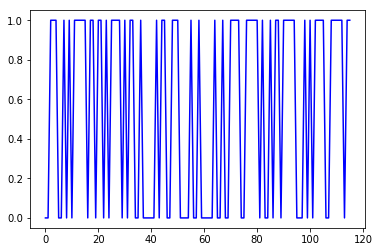

In [12]:
plt.plot((IYW_ret.values>spx_ret.values).flatten(),'b-')
plt.show()

In [13]:



# 1: for positive return, 0:for negative return
# positive_ret = IYW_ret[IYW_ret>0.05].notnull()*1

# temp = pd.concat([IYZ_ret,spx_ret],1).dropna()
# comparison = temp.iloc[:,0]-temp.iloc[:,1]
defeat_benchmark = pd.DataFrame((IYW_ret.values>spx_ret.values),index= IYW_ret.index,columns=['defeat_benchmark'])*1


x,y = model_data(x,defeat_benchmark)

In [18]:
# %store -r top_sector

In [21]:
# top_sector.loc[:,'IYW US Equity']*1

2000-08-31    1
2000-09-29    0
2000-10-31    0
2000-11-30    0
2000-12-29    0
2001-01-31    1
2001-02-28    0
2001-03-30    0
2001-04-30    1
2001-05-31    0
2001-06-29    1
2001-07-31    0
2001-08-31    0
2001-09-28    0
2001-10-31    1
2001-11-30    1
2001-12-31    0
2002-01-31    1
2002-02-28    0
2002-03-28    1
2002-04-30    0
2002-05-31    0
2002-06-28    0
2002-07-31    0
2002-08-30    0
2002-09-30    0
2002-10-31    1
2002-11-29    1
2002-12-31    0
2003-01-31    1
             ..
2015-03-31    0
2015-04-30    1
2015-05-29    1
2015-06-30    0
2015-07-31    0
2015-08-31    0
2015-09-30    1
2015-10-30    0
2015-11-30    0
2015-12-31    0
2016-01-29    0
2016-02-29    0
2016-03-31    1
2016-04-29    0
2016-05-31    1
2016-06-30    0
2016-07-29    1
2016-08-31    1
2016-09-30    1
2016-10-31    1
2016-11-30    0
2016-12-30    0
2017-01-31    1
2017-02-28    1
2017-03-31    1
2017-04-28    1
2017-05-31    1
2017-06-30    0
2017-07-31    1
2017-08-31    1
Name: IYW US Equity, Len

In [14]:
train_index = x.index[0:len(x.index)*3/4]
validate_index = pd.DatetimeIndex(np.setdiff1d(x.index,train_index))

logistic  = LogisticRegression()
logistic.fit(x.loc[train_index,:],y.loc[train_index,:])

y_predict = pd.DataFrame(logistic.predict(x.loc[validate_index,:]),index = validate_index)

pd.DataFrame(logistic.coef_,columns = x.columns)

/home/luke/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,CPALTT01USQ657N,GDP,CSUSHPINSA,CSUSHPINSA,DGS10,CSUSHPINSA,CSUSHPINSA,TEDRATE,FEDFUNDS,PCE,UNRATE,RECPROUSM156N,VIXCLS
0,-0.392634,0.036071,0.304854,0.304854,1.366021,0.304854,0.304854,-0.048088,0.159395,0.014712,-0.375419,-0.279949,-0.02714


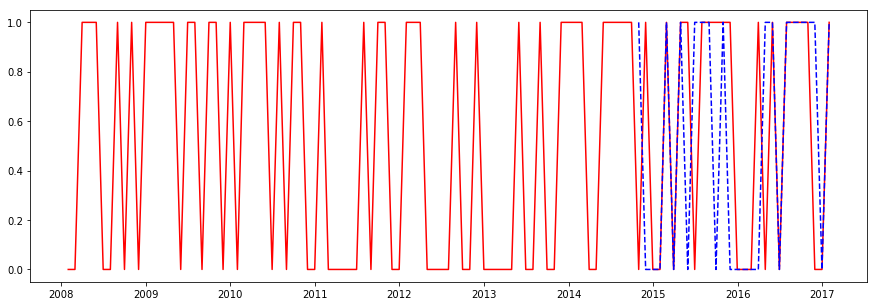

In [15]:
plt.figure(figsize=(15,5))
plt.plot(y,'r-')
plt.plot(y_predict,'b--')
plt.show()

In [16]:
comparison_df = pd.concat([y,y_predict],1).dropna()
score_df = pd.DataFrame(map(lambda x: x[0]==x[1],comparison_df.values))*1
score = np.mean(score_df)

print("prediction rate: "+str(round(score*100,3))+"%")

prediction rate: 67.857%
